In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, mean_squared_error

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from dt_class import DecisionTree

%matplotlib inline

In [2]:
RANDOM_STATE = 14

In [3]:
def insert_null_values(X, features, null_ratio, random_state=RANDOM_STATE):
    X_copied = X.copy()
    random.seed(random_state)
    for feat in features:
        null_indexes = random.sample(range(X.shape[0]), int(round(X.shape[0] * null_ratio)))
        X_copied[:, feat][null_indexes] = np.nan
    return X_copied

In [4]:
def plot_gs_cv(grid, estimators, x_label, y_label, negative=False, filename=None):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,6))
    
    ax1.set_title('Train score')
    for lbl, est in estimators.items():
        mean = est.cv_results_['mean_train_score']
        if negative: mean = mean * -1.0
        std = est.cv_results_['std_train_score']
        ax1.plot(grid, mean, label=lbl)
        ax1.fill_between(grid, mean - std, mean + std, alpha = 0.2)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.grid()
    ax1.legend()
    
    ax2.set_title('Test score')
    for lbl, est in estimators.items():
        mean = est.cv_results_['mean_test_score']
        if negative: mean = mean * -1.0
        std = est.cv_results_['std_test_score']
        ax2.plot(grid, mean, label=lbl)
        ax2.fill_between(grid, mean - std, mean + std, alpha = 0.2)
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.grid()
    ax2.legend()
    
    if filename is not None:
        plt.savefig(filename, format='png', dpi=150)

In [5]:
def plot_cv_scores(grid, scores, x_label, y_label, negative=False, filename=None):
    plt.figure(figsize=(16, 6))
    for lbl, s in scores.items():
        mean = np.array(s[0])
        if negative: mean = mean * -1.0
        plt.plot(grid, mean, label=lbl)
        plt.fill_between(grid, mean - np.array(s[1]), mean + np.array(s[1]), alpha = 0.2)
    plt.title('Cross-validated score')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.legend()
    
    if filename is not None:
        plt.savefig(filename, format='png', dpi=150)

In [6]:
def plot_nulls_scores(grid, simple_score, surrogate_score, x_label, y_label, filename=None):
    plt.figure(figsize=(16, 6))
    plt.plot(grid, simple_score, label='simple splits')
    plt.plot(grid, surrogate_score, label='surrogate splits')
    plt.title('Test score')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.legend()
    
    if filename is not None:
        plt.savefig(filename, format='png', dpi=150)

### classification test

In [7]:
X, y = make_classification(n_features=10, n_informative=5, n_redundant=2, n_samples=1000, 
                           n_clusters_per_class=5, class_sep=1.0, random_state=RANDOM_STATE)

In [8]:
gs_param_grid = {'max_depth': range(2, 16)}

gscv_params = {'param_grid': gs_param_grid,
               'scoring': 'roc_auc', 
               'cv': 5, 
               'return_train_score': True, 
               'n_jobs': -1}

#### gini

In [9]:
sklearn_tree = DecisionTreeClassifier(criterion='gini', random_state=RANDOM_STATE)
sklearn_gscv = GridSearchCV(estimator=sklearn_tree, **gscv_params)

custom_tree = DecisionTree(criterion='gini')
custom_gscv = GridSearchCV(estimator=custom_tree, **gscv_params)

In [10]:
%%time
sklearn_gscv.fit(X, y)

CPU times: user 89.8 ms, sys: 37.2 ms, total: 127 ms
Wall time: 302 ms


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=14,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 16)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [11]:
%%time
custom_gscv.fit(X, y)

CPU times: user 5.13 s, sys: 60.2 ms, total: 5.19 s
Wall time: 1min 25s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTree(criterion='gini', max_depth=inf, min_samples_split=2,
       use_surrogate_splits=False, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 16)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

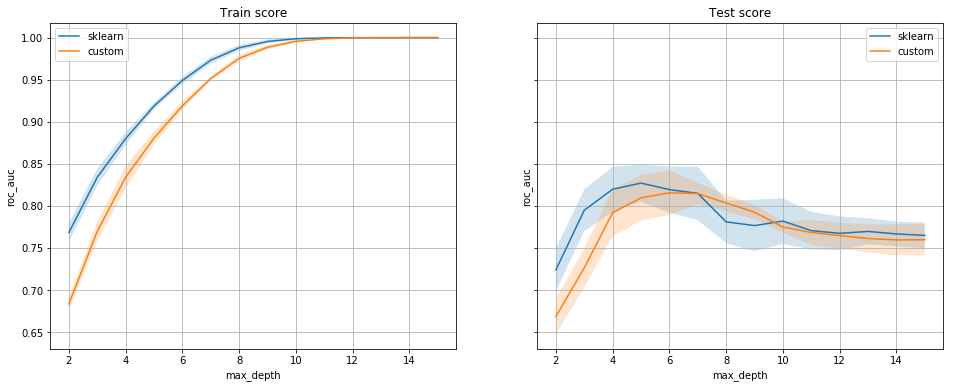

In [12]:
plot_gs_cv(grid=gs_param_grid['max_depth'], 
           estimators={'sklearn': sklearn_gscv, 'custom': custom_gscv}, 
           x_label='max_depth', y_label='roc_auc',
           filename='./img/comparsion_gini.png')

#### entropy

In [13]:
sklearn_tree = DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
sklearn_gscv = GridSearchCV(estimator=sklearn_tree, **gscv_params)

custom_tree = DecisionTree(criterion='entropy')
custom_gscv = GridSearchCV(estimator=custom_tree, **gscv_params)

In [14]:
%%time
sklearn_gscv.fit(X, y)

CPU times: user 92.9 ms, sys: 39.7 ms, total: 133 ms
Wall time: 409 ms


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=14,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 16)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [15]:
%%time
custom_gscv.fit(X, y)

CPU times: user 5.51 s, sys: 59.3 ms, total: 5.57 s
Wall time: 1min 27s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTree(criterion='entropy', max_depth=inf, min_samples_split=2,
       use_surrogate_splits=False, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 16)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

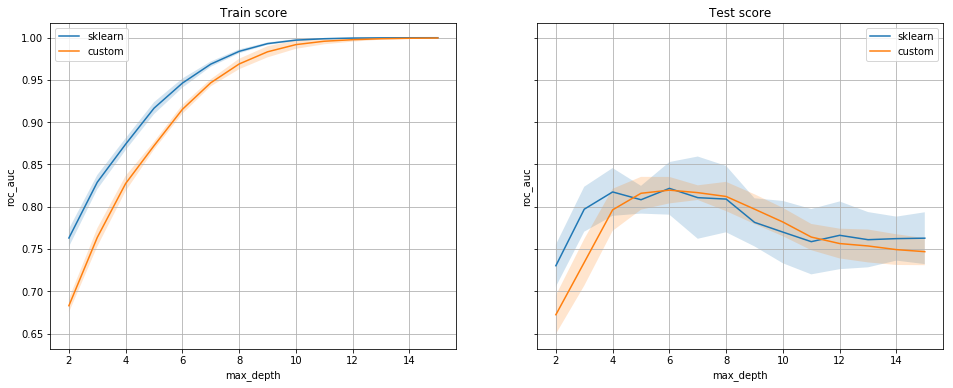

In [16]:
plot_gs_cv(grid=gs_param_grid['max_depth'], 
           estimators={'sklearn': sklearn_gscv, 'custom': custom_gscv}, 
           x_label='max_depth', y_label='roc_auc', 
           filename='./img/comparsion_entropy.png')

#### missing values

In [17]:
custom_tree_simple = DecisionTree(criterion='gini', max_depth=7, use_surrogate_splits=False)
custom_tree_surrogate = DecisionTree(criterion='gini', max_depth=7, use_surrogate_splits=True)

In [18]:
%%time

null_ratios = np.arange(0.05, 0.55, 0.05)

means_simple, means_surrogate = [], []
stds_simple, stds_surrogate = [], []

for null_ratio in null_ratios:
    X_nulls = insert_null_values(X, features=range(10), null_ratio=null_ratio)
    
    score_simple = cross_val_score(custom_tree_simple, X_nulls, y, scoring='roc_auc', cv=5, n_jobs=-1)
    means_simple.append(np.mean(score_simple))
    stds_simple.append(np.std(score_simple))
    
    score_surrogate = cross_val_score(custom_tree_surrogate, X_nulls, y, scoring='roc_auc', cv=5, n_jobs=-1)
    means_surrogate.append(np.mean(score_surrogate))
    stds_surrogate.append(np.std(score_surrogate))

CPU times: user 1 s, sys: 699 ms, total: 1.7 s
Wall time: 1min 22s


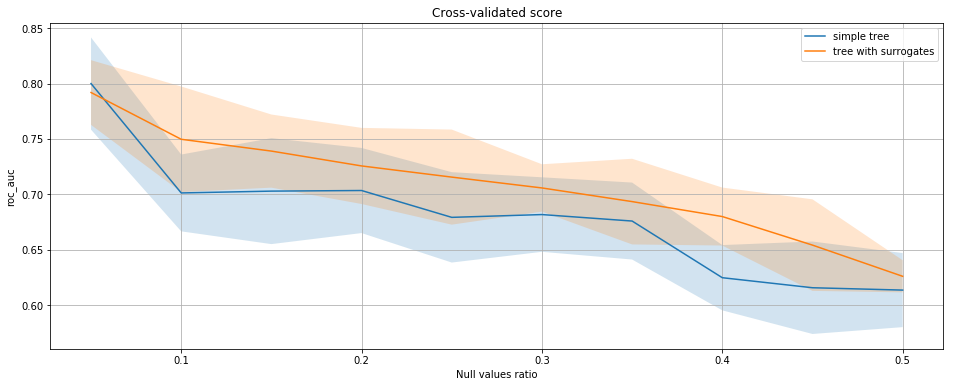

In [19]:
plot_cv_scores(grid=null_ratios, 
               scores={'simple tree': (means_simple, stds_simple), 
                       'tree with surrogates': (means_surrogate, stds_surrogate)}, 
               x_label='Null values ratio', y_label='roc_auc',
               filename='./img/missing_classification.png')

#### missing only test values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
%%time
custom_tree_simple.fit(X, y)

CPU times: user 5.69 s, sys: 4.08 ms, total: 5.7 s
Wall time: 5.7 s


DecisionTree(criterion='gini', max_depth=7, min_samples_split=2,
       use_surrogate_splits=False, verbose=False)

In [22]:
%%time
custom_tree_surrogate.fit(X, y)

CPU times: user 5.71 s, sys: 4.12 ms, total: 5.72 s
Wall time: 5.72 s


DecisionTree(criterion='gini', max_depth=7, min_samples_split=2,
       use_surrogate_splits=True, verbose=False)

In [23]:
test_scores_simple = []
test_scores_surrogate = []

for null_ratio in null_ratios:
    X_test_nulls = insert_null_values(X_test, features=range(10), null_ratio=null_ratio)
    test_scores_simple.append(roc_auc_score(y_test, custom_tree_simple.predict_proba(X_test_nulls)[:, 1]))
    test_scores_surrogate.append(roc_auc_score(y_test, custom_tree_surrogate.predict_proba(X_test_nulls)[:, 1]))

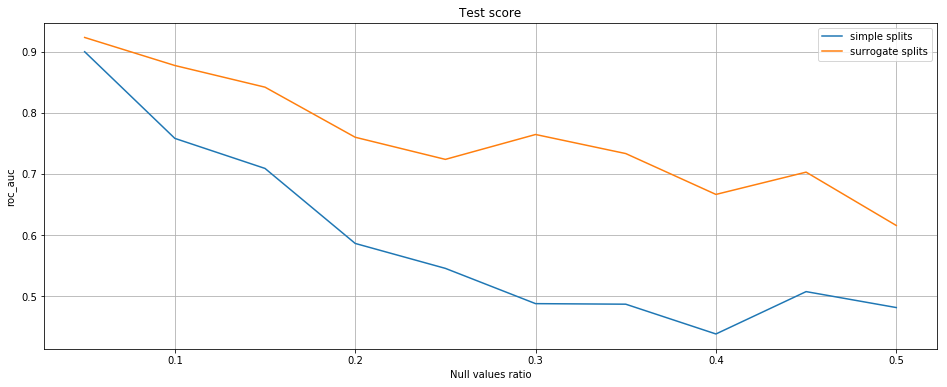

In [24]:
plot_nulls_scores(null_ratios, test_scores_simple, test_scores_surrogate, 
                  x_label='Null values ratio', y_label='roc_auc', filename='./img/test_missing_classification.png')

### regression test

In [25]:
X, y = make_regression(n_features=10, n_informative=7, n_samples=1000, 
                       noise=0.05 ,random_state=RANDOM_STATE)

In [26]:
gs_param_grid = {'max_depth': range(2, 16)}

gscv_params = {'param_grid': gs_param_grid,
               'scoring': 'neg_mean_squared_error', 
               'cv': 5, 
               'return_train_score': True, 
               'n_jobs': -1}

#### variance

In [27]:
sklearn_tree = DecisionTreeRegressor(criterion='mse', random_state=RANDOM_STATE)
sklearn_gscv = GridSearchCV(estimator=sklearn_tree, **gscv_params)

custom_v_tree = DecisionTree(criterion='variance')
custom_v_gscv = GridSearchCV(estimator=custom_v_tree, **gscv_params)

custom_mm_tree = DecisionTree(criterion='mad_median')
custom_mm_gscv = GridSearchCV(estimator=custom_mm_tree, **gscv_params)

In [28]:
%%time
sklearn_gscv.fit(X, y)

CPU times: user 86.3 ms, sys: 41.8 ms, total: 128 ms
Wall time: 303 ms


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=14, splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 16)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [29]:
%%time
custom_v_gscv.fit(X, y)

CPU times: user 7.8 s, sys: 69.1 ms, total: 7.87 s
Wall time: 1min 35s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTree(criterion='variance', max_depth=inf, min_samples_split=2,
       use_surrogate_splits=False, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 16)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [30]:
%%time
custom_mm_gscv.fit(X, y)

CPU times: user 17.4 s, sys: 79.1 ms, total: 17.5 s
Wall time: 3min 18s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTree(criterion='mad_median', max_depth=inf, min_samples_split=2,
       use_surrogate_splits=False, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 16)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

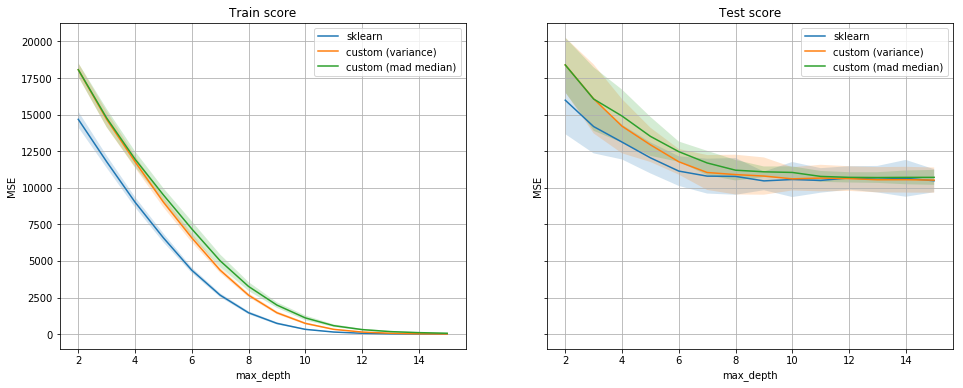

In [31]:
plot_gs_cv(grid=gs_param_grid['max_depth'], 
           estimators={'sklearn': sklearn_gscv, 
                       'custom (variance)': custom_v_gscv, 
                       'custom (mad median)': custom_mm_gscv}, 
           x_label='max_depth', y_label='MSE',
           negative=True,
           filename='./img/comparsion_regression.png')

#### missing values

In [32]:
custom_tree_simple = DecisionTree(criterion='variance', max_depth=8, use_surrogate_splits=False)
custom_tree_surrogate = DecisionTree(criterion='variance', max_depth=8, use_surrogate_splits=True)

In [33]:
%%time

null_ratios = np.arange(0.05, 0.55, 0.05)

means_simple, means_surrogate = [], []
stds_simple, stds_surrogate = [], []

for null_ratio in null_ratios:
    X_nulls = insert_null_values(X, features=range(10), null_ratio=null_ratio)
    
    score_simple = cross_val_score(custom_tree_simple, X_nulls, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    means_simple.append(np.mean(score_simple))
    stds_simple.append(np.std(score_simple))
    
    score_surrogate = cross_val_score(custom_tree_surrogate, X_nulls, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    means_surrogate.append(np.mean(score_surrogate))
    stds_surrogate.append(np.std(score_surrogate))

CPU times: user 1.09 s, sys: 702 ms, total: 1.79 s
Wall time: 1min 22s


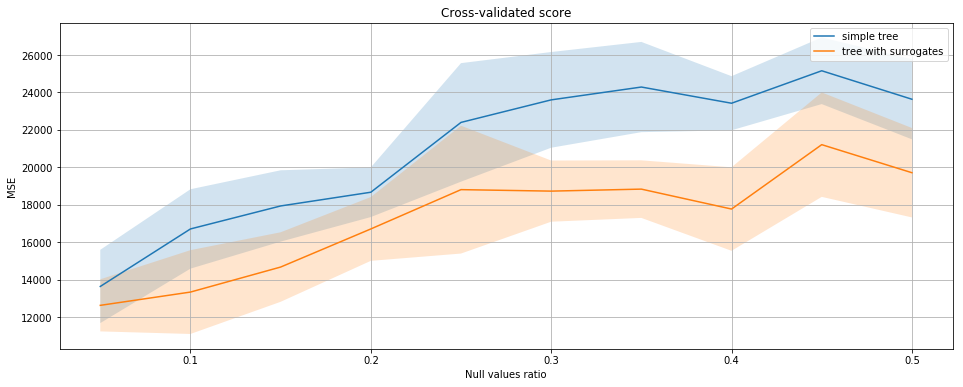

In [34]:
plot_cv_scores(grid=null_ratios, 
               scores={'simple tree': (means_simple, stds_simple), 
                       'tree with surrogates': (means_surrogate, stds_surrogate)}, 
               x_label='Null values ratio', y_label='MSE',
               negative=True,
               filename='./img/missing_regression.png')

#### missing only test values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
%%time
custom_tree_simple.fit(X, y)

CPU times: user 5.02 s, sys: 8.45 ms, total: 5.03 s
Wall time: 5.03 s


DecisionTree(criterion='variance', max_depth=8, min_samples_split=2,
       use_surrogate_splits=False, verbose=False)

In [37]:
%%time
custom_tree_surrogate.fit(X, y)

CPU times: user 5.32 s, sys: 15.3 ms, total: 5.34 s
Wall time: 5.35 s


DecisionTree(criterion='variance', max_depth=8, min_samples_split=2,
       use_surrogate_splits=True, verbose=False)

In [38]:
test_scores_simple = []
test_scores_surrogate = []

for null_ratio in null_ratios:
    X_test_nulls = insert_null_values(X_test, features=range(10), null_ratio=null_ratio)
    test_scores_simple.append(mean_squared_error(y_test, custom_tree_simple.predict(X_test_nulls)))
    test_scores_surrogate.append(mean_squared_error(y_test, custom_tree_surrogate.predict(X_test_nulls)))

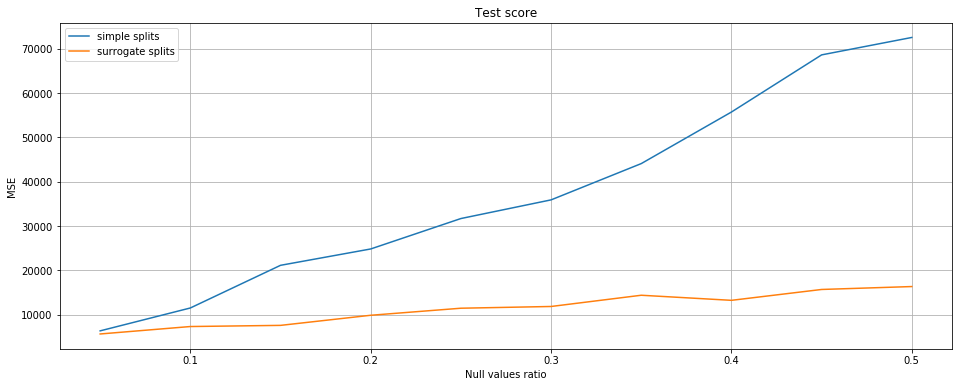

In [39]:
plot_nulls_scores(null_ratios, test_scores_simple, test_scores_surrogate, 
                  x_label='Null values ratio', y_label='MSE', filename='./img/test_missing_regression.png')